In [1]:
import zipfile
with zipfile.ZipFile("archive.zip","r") as f:
    f.extractall(".")


In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [89]:
## Task 1
df = pd.read_csv("911.csv",
                 encoding="cp1251",
                names=["lat", "ing", "desc", "zip", "title", "accident_time", "town", "address", "e"],
                 skiprows=1,
                parse_dates=["accident_time"])
df.dtypes

lat                     float64
ing                     float64
desc                     object
zip                     float64
title                    object
accident_time    datetime64[ns]
town                     object
address                  object
e                         int64
dtype: object

In [4]:
## TASK 2 
df.drop(["desc","zip","address","e"],inplace=True,axis=1)
df.dtypes

lat                     float64
ing                     float64
title                    object
accident_time    datetime64[ns]
town                     object
dtype: object

In [5]:
## Task 3
df = df.iloc[:,[-1,0,1,3,2]]

In [6]:
df.head(1)

,town,lat,ing,accident_time,title
0,NEW HANOVER,40.297876,-75.581294,2015-12-10 17:10:52,EMS: BACK PAINS/INJURY


In [70]:
#Task 4 
towns_df = df["town"].value_counts(ascending=True)

In [71]:
towns_df

LEHIGH COUNTY        190
PHILA COUNTY         267
GREEN LANE           385
BRYN ATHYN          1254
EAST GREENVILLE     1316
                   ...  
CHELTENHAM         30574
UPPER MERION       36010
NORRISTOWN         37633
ABINGTON           39947
LOWER MERION       55490
Name: town, Length: 68, dtype: int64

In [87]:
## TASK 5
t5_df = df[df["town"].isin(towns_df.iloc[[0,1,-1,-2]].index.tolist())]
t5_df
t5_df.dtypes

town                     object
lat                     float64
ing                     float64
accident_time    datetime64[ns]
title                    object
dtype: object

In [73]:
## Task 6
df_t6 = df[~df["town"].isin(towns_df.iloc[[0,1,-1,-2]].index.tolist())].dropna(subset=["town"])
df_t6
df_t6["hour"] = df_t6["accident_time"].dt.hour

In [155]:
## Task 7,8
count = df_t6["hour"].value_counts(normalize=True,sort=True)
count = pd.DataFrame(count)
count = count.reset_index()
count.columns = ['hour', 'counts']

count.dtypes

hour        int64
counts    float64
dtype: object

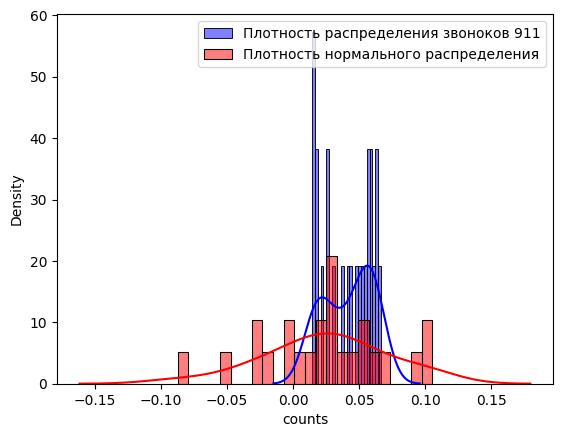

In [156]:
# Task 9
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


np.random.seed(365)
x1 = np.random.normal(0.02, 0.05, size=24) 
ndf = pd.DataFrame({'x1': x1})
x1

#sns.distplot(count)


sns.histplot(
    count["counts"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    bins=24, color="blue",label="Плотность распределения звоноков 911"
)





sns.histplot(
    ndf["x1"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    bins=24, color="red",label="Плотность нормального распределения"
)
plt.legend()


<AxesSubplot:xlabel='hour', ylabel='counts'>

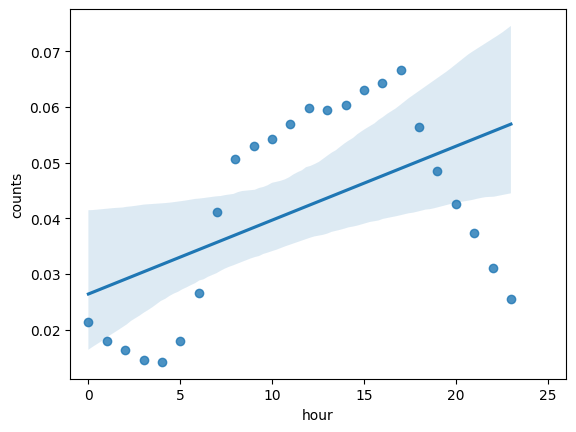

In [162]:
#Task 10
plt.xlim(-1,26)
sns.regplot(data=count,x="hour",y="counts")